<a href="https://colab.research.google.com/github/MoRebaie/NLP-in-Tensorflow/blob/master/Course_4_Week_3_Lesson_1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

1.14.0


In [2]:
# If the tf.__version__ is 1.x, please run this cell
#!pip install tensorflow==2.0.0-beta0

     |████████████████████████████████| 87.9MB 1.3MB/s 
     |████████████████████████████████| 501kB 35.8MB/s 
     |████████████████████████████████| 3.1MB 40.0MB/s 
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

W0705 19:14:54.629765 140048228030336 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_datasets/core/file_format_adapter.py:209: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [0]:
tokenizer = info.features['text'].encoder

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10


W0705 19:20:35.478877 140048228030336 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


391/391 [==============================] - 1855s 5s/step - loss: 0.5194 - accuracy: 0.7368 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 1611s 4s/step - loss: 0.3907 - accuracy: 0.8340 - val_loss: 0.4361 - val_accuracy: 0.8149
Epoch 3/10
391/391 [==============================] - 1577s 4s/step - loss: 0.3032 - accuracy: 0.8830 - val_loss: 0.4534 - val_accuracy: 0.8149
Epoch 4/10
391/391 [==============================] - 1543s 4s/step - loss: 0.2422 - accuracy: 0.9095 - val_loss: 0.3888 - val_accuracy: 0.8459
Epoch 5/10
391/391 [==============================] - 1562s 4s/step - loss: 0.2092 - accuracy: 0.9240 - val_loss: 0.5465 - val_accuracy: 0.7506
Epoch 6/10
391/391 [==============================] - 1559s 4s/step - loss: 0.4081 - accuracy: 0.8170 - val_loss: 0.5552 - val_accuracy: 0.7511
Epoch 7/10
391/391 [==============================] - 1565s 4s/step - loss: 0.2194 - accuracy: 0.9161 - val_loss: 0.4422 - val_accuracy: 0.

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

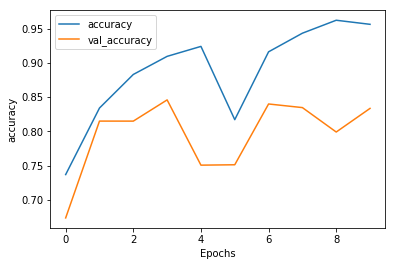

In [11]:
plot_graphs(history, 'accuracy')

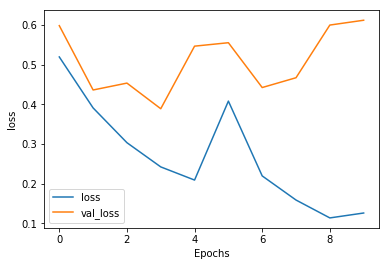

In [12]:
plot_graphs(history, 'loss')